# 라이브러리

In [1]:
import numpy as np 
import pandas as pd 

# 데이터 불러오기

In [2]:
train = pd.read_csv('C:/Users/bsh36/Desktop/Data/walmart/train/train.csv')
test = pd.read_csv('C:/Users/bsh36/Desktop/Data/walmart/test/test.csv')
sub = pd.read_csv('C:/Users/bsh36/Desktop/Data/walmart/sampleSubmission/sampleSubmission.csv')
store = pd.read_csv('C:/Users/bsh36/Desktop/Data/walmart/stores.csv')

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
train = pd.merge(train, store, on='Store', how='left')
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


# 데이터 전처리

In [7]:
train = train.replace({'A':0, 'B':1, 'C':2})
test = pd.merge(test, store, on='Store', how='left')
test = test.replace({'A':0, 'B':1, 'C':2})
test

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,0,151315
1,1,1,2012-11-09,False,0,151315
2,1,1,2012-11-16,False,0,151315
3,1,1,2012-11-23,True,0,151315
4,1,1,2012-11-30,False,0,151315
...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,1,118221
115060,45,98,2013-07-05,False,1,118221
115061,45,98,2013-07-12,False,1,118221
115062,45,98,2013-07-19,False,1,118221


In [8]:
# Date 컬럼 datetime 적용(년,월,일)
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.week
train['Day'] = train['Date'].dt.day
# 몇재쭈 컬럼추가 
train['Week_num'] = np.ceil(train['Day']/7)
train

c:\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Year,Month,Week,Day,Week_num
0,1,1,2010-02-05,24924.50,False,0,151315,2010,2,5,5,1.0
1,1,1,2010-02-12,46039.49,True,0,151315,2010,2,6,12,2.0
2,1,1,2010-02-19,41595.55,False,0,151315,2010,2,7,19,3.0
3,1,1,2010-02-26,19403.54,False,0,151315,2010,2,8,26,4.0
4,1,1,2010-03-05,21827.90,False,0,151315,2010,3,9,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,1,118221,2012,9,39,28,4.0
421566,45,98,2012-10-05,628.10,False,1,118221,2012,10,40,5,1.0
421567,45,98,2012-10-12,1061.02,False,1,118221,2012,10,41,12,2.0
421568,45,98,2012-10-19,760.01,False,1,118221,2012,10,42,19,3.0


In [9]:
# test셋에도 동일하게 적용
test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Week'] = test['Date'].dt.week
test['Day'] = test['Date'].dt.day
test['Week_num'] = np.ceil(test['Day']/7)
test

c:\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,Store,Dept,Date,IsHoliday,Type,Size,Year,Month,Week,Day,Week_num
0,1,1,2012-11-02,False,0,151315,2012,11,44,2,1.0
1,1,1,2012-11-09,False,0,151315,2012,11,45,9,2.0
2,1,1,2012-11-16,False,0,151315,2012,11,46,16,3.0
3,1,1,2012-11-23,True,0,151315,2012,11,47,23,4.0
4,1,1,2012-11-30,False,0,151315,2012,11,48,30,5.0
...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,1,118221,2013,6,26,28,4.0
115060,45,98,2013-07-05,False,1,118221,2013,7,27,5,1.0
115061,45,98,2013-07-12,False,1,118221,2013,7,28,12,2.0
115062,45,98,2013-07-19,False,1,118221,2013,7,29,19,3.0


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

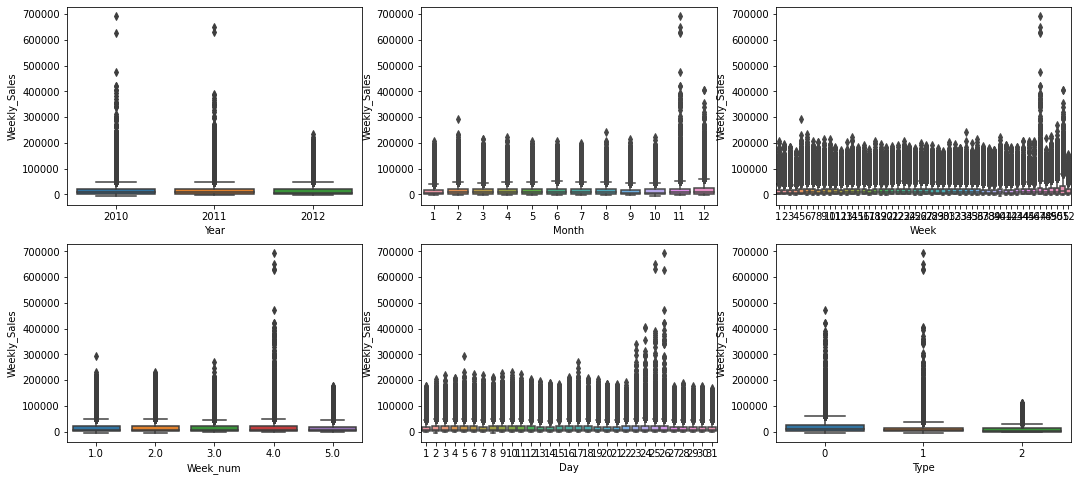

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.boxplot(data=train, x="Year", y="Weekly_Sales", ax=ax1,showfliers=True)
sns.boxplot(data=train, x="Month", y="Weekly_Sales", ax=ax2,showfliers=True)
sns.boxplot(data=train, x="Week", y="Weekly_Sales", ax=ax3,showfliers=True)
sns.boxplot(data=train, x="Week_num", y="Weekly_Sales", ax=ax4,showfliers=True)
sns.boxplot(data=train, x="Day", y="Weekly_Sales", ax=ax5,showfliers=True)
sns.boxplot(data=train, x="Type", y="Weekly_Sales", ax=ax6,showfliers=True)

# ax1.set(title="년")
# ax2.set(title="월")
# ax3.set( title="주")
# ax4.set( title="주차")
# ax4.set( title="일")



* 연도별 판매량은 2010,2011년이 많다.
* 달별 판매량은 연말일 수록 많다.
* 주별 판매량은 연말에 많다.
* 주차 판매량은 4주차에 많다.
* 일별 판매량은 23~27이 많다.
* 1 타입이 판매량이 많다.


# 모델링

In [13]:
train2 = train.drop(['Weekly_Sales','Date'],axis=1)
train2

,Store,Dept,IsHoliday,Type,Size,Year,Month,Week,Day,Week_num
0,1,1,False,0,151315,2010,2,5,5,1.0
1,1,1,True,0,151315,2010,2,6,12,2.0
2,1,1,False,0,151315,2010,2,7,19,3.0
3,1,1,False,0,151315,2010,2,8,26,4.0
4,1,1,False,0,151315,2010,3,9,5,1.0
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,False,1,118221,2012,9,39,28,4.0
421566,45,98,False,1,118221,2012,10,40,5,1.0
421567,45,98,False,1,118221,2012,10,41,12,2.0
421568,45,98,False,1,118221,2012,10,42,19,3.0


In [14]:
test2 = test.drop(['Date'],axis=1)
test2

,Store,Dept,IsHoliday,Type,Size,Year,Month,Week,Day,Week_num
0,1,1,False,0,151315,2012,11,44,2,1.0
1,1,1,False,0,151315,2012,11,45,9,2.0
2,1,1,False,0,151315,2012,11,46,16,3.0
3,1,1,True,0,151315,2012,11,47,23,4.0
4,1,1,False,0,151315,2012,11,48,30,5.0
...,...,...,...,...,...,...,...,...,...,...
115059,45,98,False,1,118221,2013,6,26,28,4.0
115060,45,98,False,1,118221,2013,7,27,5,1.0
115061,45,98,False,1,118221,2013,7,28,12,2.0
115062,45,98,False,1,118221,2013,7,29,19,3.0


In [11]:
from sklearn.ensemble import RandomForestRegressor 

In [12]:
rf = RandomForestRegressor(n_jobs = -1)

In [17]:
rf.fit(train2, train['Weekly_Sales'])

RandomForestRegressor(n_jobs=-1)

In [18]:
result = rf.predict(test2)
result

array([35596.8084, 20165.4527, 19197.6381, ...,   750.2754,   790.5316,
         710.6794])

In [20]:
sub.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [21]:
sub['Weekly_Sales']= result
sub

,Id,Weekly_Sales
0,1_1_2012-11-02,35596.8084
1,1_1_2012-11-09,20165.4527
2,1_1_2012-11-16,19197.6381
3,1_1_2012-11-23,20165.5976
4,1_1_2012-11-30,28111.6928
...,...,...
115059,45_98_2013-06-28,667.9378
115060,45_98_2013-07-05,684.0638
115061,45_98_2013-07-12,750.2754
115062,45_98_2013-07-19,790.5316


In [23]:
sub.to_csv('C:/Users/bsh36/Desktop/Data/walmart/sub.csv',index=False)